# SDS Challenge #3 - Job Postings

## Problem Statement

Welcome Data Scientist to the 3rd SDS Club Monthly Challenge! In this month's challenge you are helping your friend search for a job. Your friend has found thousands of job ads online and is trying to pick some to apply to. Your friends has heard that there are a lot of fraudulent job ads that are actually scams. Your mission is to help your friend by predicting whether a job is fraudulent based on the data provided.

## Evaluation

\begin{equation*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}
<br>

## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below.

**title** - title of the job in ad <br>
**location** - location of job ad <br>
**department** - corporate department <br>
**salary_range** - salary range of job <br>
**company_profile** - description of company <br>
**description** - description of position <br>
**requirements** - description of job requirements <br>
**benefits** - benefits offered by the employer <br>
**telecommuting** - if telecommuting position <br>
**has_company_logo** - if the company's logo is present in the ad <br>
**has_questions** - if interview questions are present in ad <br>
**employment_type** - type of employment (full-time, part-time, contract, etc.) <br>
**required_experience** - required experience for job (master's degree, bachelor, doctorate, etc.) <br>
**industry** - industry of company (Construction, Health Care, IT, etc.) <br>
**function** - function of company within industry (consulting, sales, research, etc.) <br>
**fraudulent** - whether job is fraudulent or not <br>

## Dataset Files

**public_jobs.csv** - Dataset to train and analyze <br>
**pred_jobs.csv** - Dataset to predict whether or not a job posting is fraudulent

## Submission

All submissions should be sent through email to challenges@superdatascience.com. When submitting, the file should contain predictions made on the pred_jobs.csv file, and it should have the following format:

In [ ]:
0
1
0
0
1
0

## Acknowledgements

The data was collected and published by The University of the Aegean, Laboratory of Information & Communication Systems Security.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/hnvivek/sds_challenges/master/challenge_3/data/public_jobs.csv")

In [3]:
df_train.shape

(14304, 17)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14304 non-null  object
 1   location             14029 non-null  object
 2   department           5122 non-null   object
 3   salary_range         2325 non-null   object
 4   company_profile      11651 non-null  object
 5   description          14303 non-null  object
 6   requirements         12155 non-null  object
 7   benefits             8546 non-null   object
 8   telecommuting        14304 non-null  int64 
 9   has_company_logo     14304 non-null  int64 
 10  has_questions        14304 non-null  int64 
 11  employment_type      11542 non-null  object
 12  required_experience  8674 non-null   object
 13  required_education   7837 non-null   object
 14  industry             10404 non-null  object
 15  function             9144 non-null   object
 16  frau

In [9]:
df_train.isnull().sum()/len(df_train)*100

title                   0.000000
location                1.922539
department             64.191834
salary_range           83.745805
company_profile        18.547260
description             0.006991
requirements           15.023770
benefits               40.254474
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.309284
required_experience    39.359620
required_education     45.211130
industry               27.265101
function               36.073826
fraudulent              0.000000
dtype: float64

In [10]:
limitPer = len(df_train) * .50
df_train = df_train.dropna(thresh=limitPer,axis=1)

In [12]:
df_train.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Sales Professional - Buiding Products,"CA, BC, Langley",Great Customer Service from Start to FinishWha...,"Centra Windows an established, employee-owned ...",NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0
1,Senior Software Engineer,"GB, , London",We believe cities are complicated. And your mo...,"Londoners, New Yorkers, Parisians, and Berline...",We're looking for someone with several years' ...,NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Engineering,0
2,Director of Operations (SCM & Manufacturing),"US, WA, Bellingham",POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,Extensive Mathematical and/or Financial Backgr...,"$50 - $70k DOE and Performance + Medical, 401k...",0,1,1,Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0
3,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1
4,Data Entry Assistant - Intern,"HK, , Hong Kong","At Hayes-Corp, we create the fun stuff. With ...","Hayes Corp is looking for a patient, meticulou...",Degree in any discipline.Familiar with Microso...,"Opportunity to grow with the company, as data ...",0,1,0,Other,Entry level,Bachelor's Degree,Internet,Marketing,0


In [14]:
# Find the ratio of targetr class

df_train['fraudulent'].value_counts()

0    13595
1      709
Name: fraudulent, dtype: int64

In [17]:
# Down sampling

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.fraudulent==0]
df_minority = df_train[df_train.fraudulent==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.fraudulent.value_counts()


1    709
0    709
Name: fraudulent, dtype: int64

In [20]:
df_downsampled.isnull().sum()/len(df_downsampled)*100

title                   0.000000
location                1.622003
company_profile        41.043724
description             0.070522
requirements           15.303244
benefits               40.479549
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        22.849083
required_experience    45.275035
required_education     50.211566
industry               29.266573
function               38.293371
fraudulent              0.000000
dtype: float64

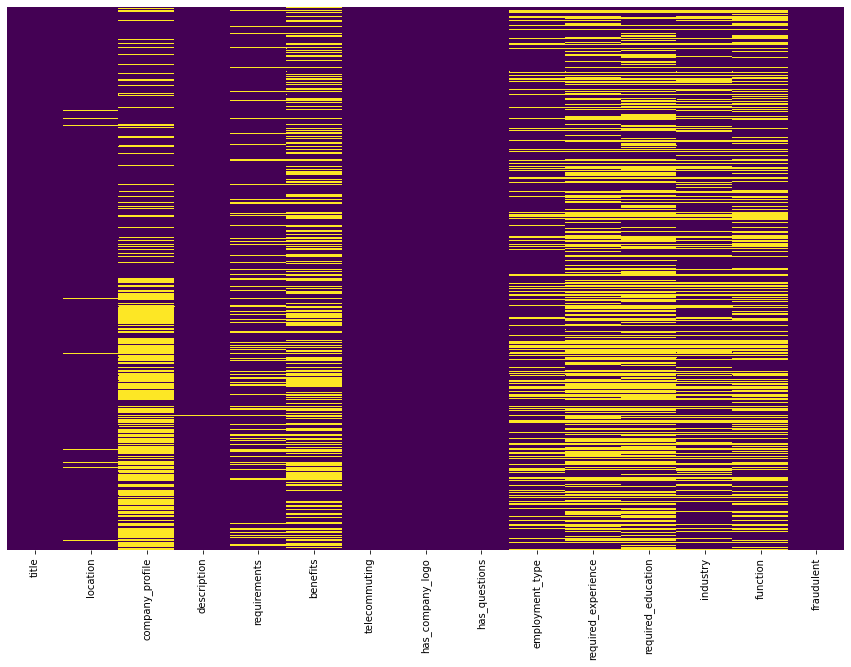

In [24]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_downsampled.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [26]:
df_downsampled.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,1418.000000,1418.000000,1418.000000,1418.000000
mean,0.059238,0.583216,0.389281,0.500000
std,0.236154,0.493200,0.487759,0.500176
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [30]:
objCol = df_downsampled.select_dtypes(include='object')
objCol

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
7187,English Teacher Abroad,"US, MA, Amherst",We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Contract,NaN,Bachelor's Degree,Education Management,NaN
2948,Sales Manager,"US, MO, St. Louis",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,Full-time,NaN,NaN,Marketing and Advertising,NaN
9213,Customer Relations - Full Time - No Call Center,"US, KY, Louisville","LEI Home Enhancements, is an Ohio based compan...",DescriptionLEI Home Enhancements is looking fo...,"JOB REQUIREMENTS:Ambition, strong work ethic a...",Put those impeccable customer service skills t...,Full-time,NaN,NaN,NaN,Customer Service
6799,Messenger Courier,"US, DC, Washington","Novitex Enterprise Solutions, formerly Pitney ...",The Messenger Courier will be based in our Wa...,Minimum Requirements:Minimum of 6 months custo...,NaN,Full-time,Entry level,High School or equivalent,Government Administration,Customer Service
7848,Service Advisor,"US, MA, Wilmington",We are a family run business that has been in ...,Bill Dube Hyundai in Wilmington MA just outsid...,This is a great opportunity to join a busy and...,Great pay plan and benefits,Full-time,NaN,NaN,Automotive,Customer Service
...,...,...,...,...,...,...,...,...,...,...,...
14173,Receptionist - Administrative Assistant,"US, TX, Houston",Titan Business Properties (TBP) is one of coun...,Normal 0 Titan Business Properties (TBP)...,Normal 0 Job Duties:Produce information ...,Normal 0 Benefits: We offer full medical...,Full-time,Entry level,High School or equivalent,Financial Services,Administrative
14186,Finance Assistant,"AU, NSW, Sydney",NaN,On behalf of our client we are looking for an ...,General requirements: · Male or Female · Age f...,With full-time and flexible part-time position...,Part-time,Not Applicable,NaN,Financial Services,Finance
14222,Administrative Workers Wanted,"GB, LND,",NaN,We are committed to the wellbeing of our plane...,NaN,SALARY INDICATION / Allowances &amp; BENEFITST...,NaN,NaN,NaN,NaN,NaN
14245,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",NaN,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,NaN,NaN,NaN,NaN,NaN


In [39]:
['value'] = df_downsampled.groupby(['fraudulent'], sort=False)
['value'].apply(lambda x: x.fillna(x.mode().iloc[0]))

NameError: ignored

In [37]:
from sklearn_pandas import CategoricalImputer

imputer = CategoricalImputer()
df_filled=imputer.fit_transform(df_downsampled)

ValueError: ignored

In [34]:
df_downsampled[objCol.columns]

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
7187,English Teacher Abroad,"US, MA, Amherst",We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Contract,NaN,Bachelor's Degree,Education Management,NaN
2948,Sales Manager,"US, MO, St. Louis",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,Full-time,NaN,NaN,Marketing and Advertising,NaN
9213,Customer Relations - Full Time - No Call Center,"US, KY, Louisville","LEI Home Enhancements, is an Ohio based compan...",DescriptionLEI Home Enhancements is looking fo...,"JOB REQUIREMENTS:Ambition, strong work ethic a...",Put those impeccable customer service skills t...,Full-time,NaN,NaN,NaN,Customer Service
6799,Messenger Courier,"US, DC, Washington","Novitex Enterprise Solutions, formerly Pitney ...",The Messenger Courier will be based in our Wa...,Minimum Requirements:Minimum of 6 months custo...,NaN,Full-time,Entry level,High School or equivalent,Government Administration,Customer Service
7848,Service Advisor,"US, MA, Wilmington",We are a family run business that has been in ...,Bill Dube Hyundai in Wilmington MA just outsid...,This is a great opportunity to join a busy and...,Great pay plan and benefits,Full-time,NaN,NaN,Automotive,Customer Service
...,...,...,...,...,...,...,...,...,...,...,...
14173,Receptionist - Administrative Assistant,"US, TX, Houston",Titan Business Properties (TBP) is one of coun...,Normal 0 Titan Business Properties (TBP)...,Normal 0 Job Duties:Produce information ...,Normal 0 Benefits: We offer full medical...,Full-time,Entry level,High School or equivalent,Financial Services,Administrative
14186,Finance Assistant,"AU, NSW, Sydney",NaN,On behalf of our client we are looking for an ...,General requirements: · Male or Female · Age f...,With full-time and flexible part-time position...,Part-time,Not Applicable,NaN,Financial Services,Finance
14222,Administrative Workers Wanted,"GB, LND,",NaN,We are committed to the wellbeing of our plane...,NaN,SALARY INDICATION / Allowances &amp; BENEFITST...,NaN,NaN,NaN,NaN,NaN
14245,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",NaN,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,NaN,NaN,NaN,NaN,NaN
